# Predicting Heart Disease Using Machine Learning

An attempt to make predictions on whether or not patients have heart disease based on their medical attributes.

Method:
1. Problem definition
2. Data analysis
3. Evaluation/What defines success
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

Because there can only be two `target` values, this is a binary classification problem.

## 2. Data

Source: https://archive.ics.uci.edu/ml/datasets/heart+disease

Locally stored @ `./data`

## 3. Evaluation

> If we can reach 95% accuracy predicting a patient has heart disease then we will pusure further discovery.

This is a soft goal for us to achieve. It may change in the future.

## 4. Features

**Data Dictionary**

* age (in years)
* sex (1 = male; 0 = female)
* cp (chest pain type, 4 values)
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
* trestbps (resting blood pressure in mm Hg on admission to the hospital)
* chol (serum cholestoral in mg/dl)
* fbs (fasting blood sugar > 120 mg/dl, 1 = true; 0 = false)
* restecg (resting electrocardiographic results (values 0,1,2))
    * 0: Nothing to note
    * 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy enlarged heart's main pumping chamber
* thalach (maximum heart rate achieved
* exang (exercise induced angina, 1 = yes; 0 = no)
* oldpeakST (ST depression induced by exercise relative to rest)
* slope (the slope of the peak exercise ST segment)
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
* ca (number of major vessels (0-3) colored by flourosopy)
* thal (thalium stress result, 1,3 = normal; 6 = fixed defect; 7 = reversable defect)
* target (Have disease or not, 1 = yes or 0 = no)

## Preparing the tools

Pandas, Matplotlib, NumPy

In [1]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# show plots in notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# from sklearn.metrics import plot_roc_curve <--- deprecated, using new submodule
from sklearn.metrics import RocCurveDisplay # <--- using the from_estimator method

## Load Data

In [2]:
# Creates Pandas DataFrame and reads in the csv file located locally in the `./data` directory
df = pd.read_csv('data/heart-disease.csv')

## Exploratory Data Analysis

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and how should we care about them?
5. How can we add, change or remove features to get more out of our data?

In [3]:
# Show the top 5 rows of the data frame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Explore quantity of each target class
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

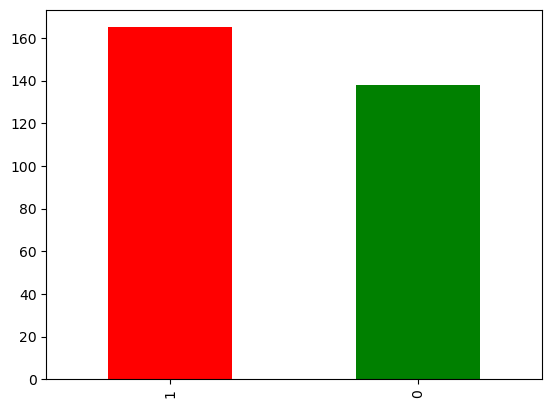

In [5]:
# Plot quantities of target class
# Relatively balanced classification data
df['target'].value_counts().plot(kind='bar', color=['red', 'green']);

In [6]:
# get the column names, data types of a given series, and quantities
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# View common statistical information, such as quartiles, standard deviation, and the mean of the columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to the Sex attribute

In [9]:
# Data is skewed towards males at ~2/3 the population
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column to sex colum
# Women in sample, ~75% have heart disease
# Men in sample, ~50% have heart disease
# ~62.5% of population (in csv) has heart disease
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


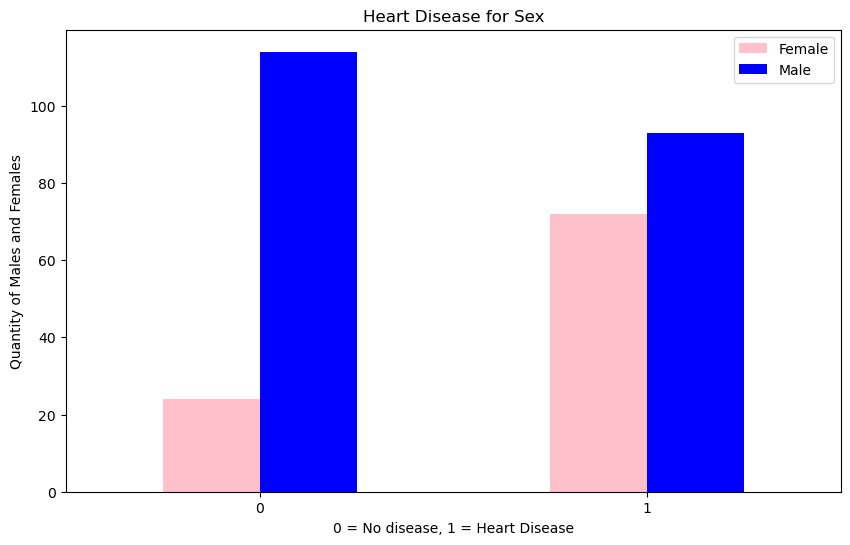

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=["pink", "blue"])
plt.title("Heart Disease for Sex")
plt.xlabel("0 = No disease, 1 = Heart Disease")
plt.ylabel("Quantity of Males and Females")
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);


In [12]:
# length of 91 means 91 different data options within data
# Too many to represent and compare in a bar graph
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

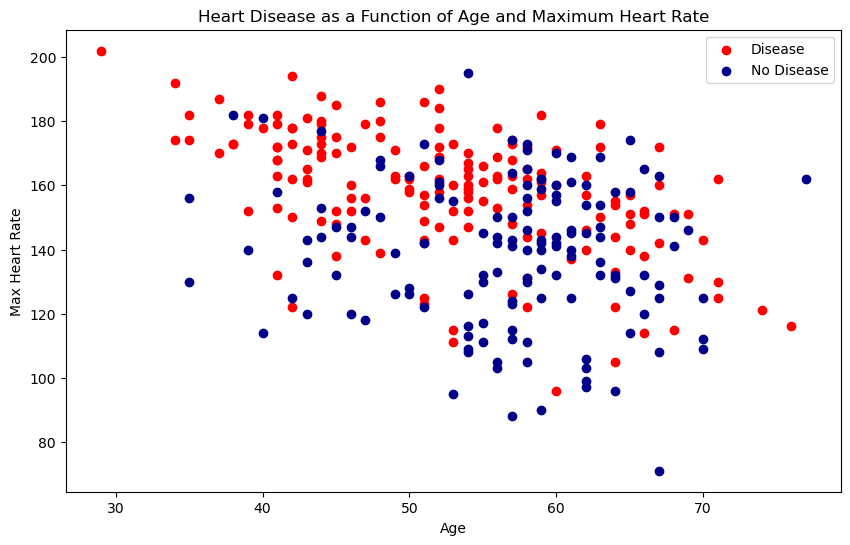

In [13]:
# Create plot
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], color=['red']);

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], color=['darkblue']);

# Add info
plt.title("Heart Disease as a Function of Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Disease', 'No Disease']);

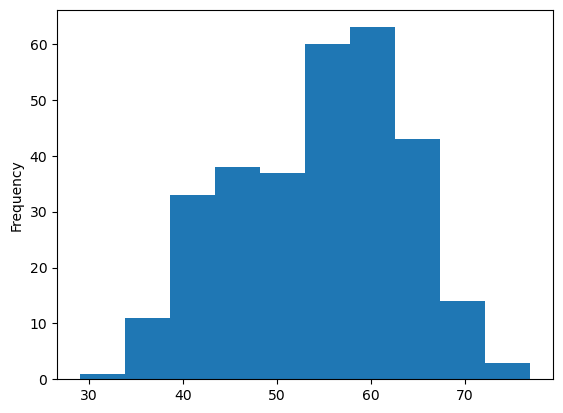

In [14]:
# Check distribution of age using histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

In [15]:
# Use crosstab to compare different types of chest pain to heart disease
# Why would non-anginal pain (esophageal spasms) relate more to heart disease?
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


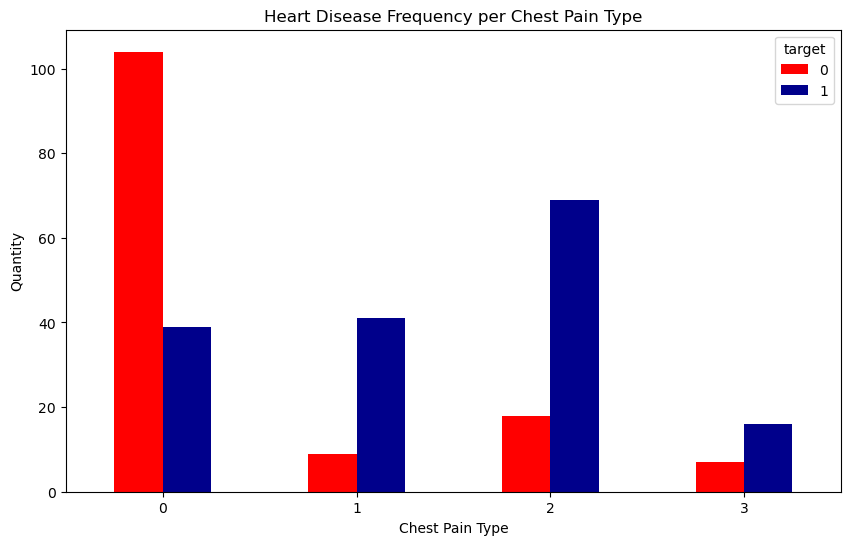

In [16]:
# Make the crosstab visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['red', 'darkblue'])

# Add info to plot
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Quantity")
plt.xticks(rotation=0);

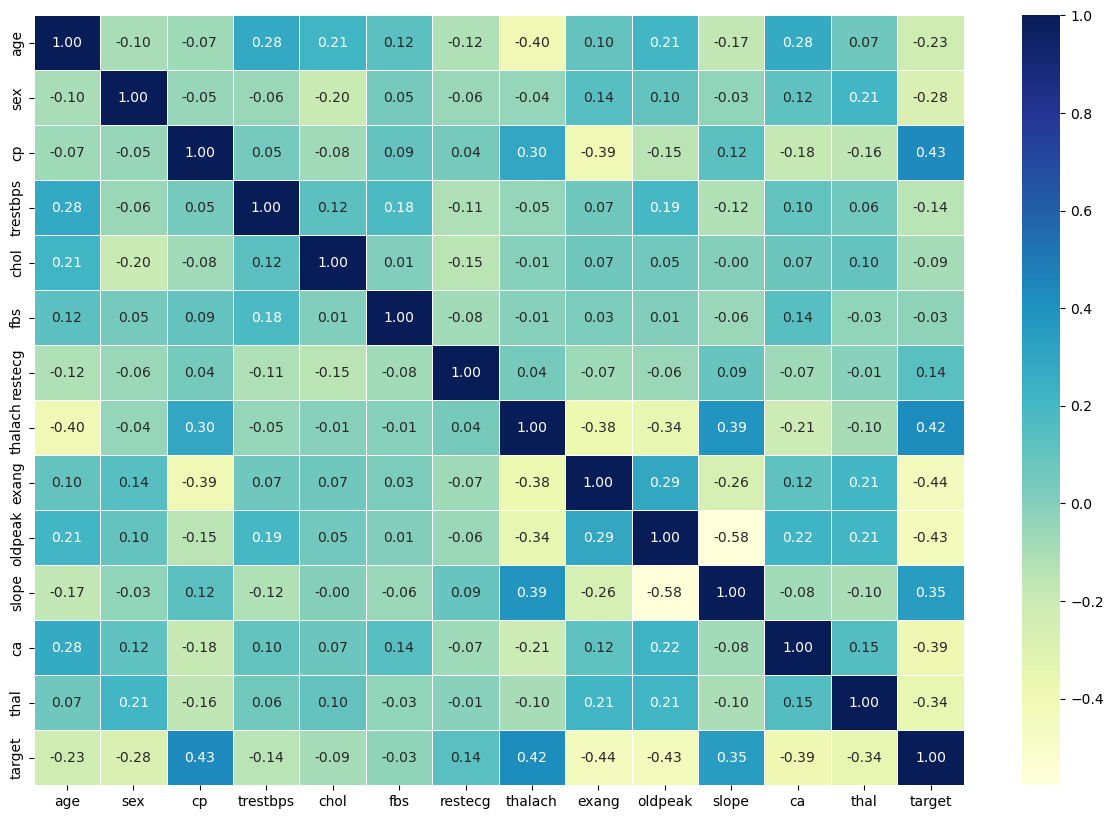

In [17]:
# Correlation Matrix with a heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5. Modeling

In [18]:
# Split data into X and y
X = df.drop('target', axis=1)

y = df['target']

In [19]:
# Define random seed to make results reproducible
np.random.seed(42)

# Split data into a train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Need to determine which machine learning model would be ideal for this classification problem. We'll try multiple algorithms to determine which returns the best results.

1. Logistic Regression (Not on the Scikit-Learn Map, find it [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) 
2. KNN Classifier
3. Random Forest Classifier

These 3 estimators/models were chosen based on the decision tree questions seen here. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Train the model on the training set.

Test models ability to generalize against data it hasn't seen, this is where the test set of data comes into play

In [20]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the set of models provides in the dictionary models.
    models: A dictionary of native Scikit-Learn models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    # Set the random seed for reproducibility
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append it's score to the model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [21]:
model_scores = fit_and_score(models=models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

C:\Users\Jesse\anaconda3\envs\heart_disease_ml_project\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

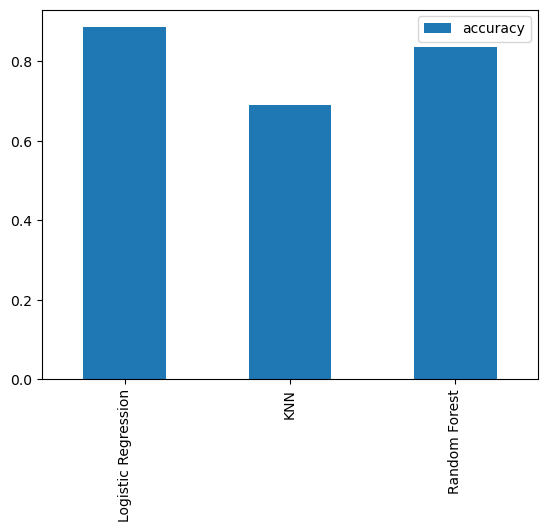

In [22]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

# The 'T' here is for transposing
# Alternatively '.T' can be left out but the plot isn't as clear
model_compare.T.plot.bar();

### Notes on performance Bar Chart above

We can see that KNN, in this particular case, has a large unfavorable delta to the other two

Despite the KNN model being blatantly worse than the other two, we may continute to use KNN for no other reason than to practice tuning it

### Baseline model analysis complete.

Need to do the following:
* Hyperparameter tuning
* Feature Importance
* Confusion Matrix
* Classification Report
* Cross-validation
* Precision
* Recall
* F1 Score
* ROC Curve
* AUC (Area under the curve)

### Hyperparameter Tuning

In [23]:
# Tune KNN Model

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors (k values)
neighbors = range(1, 21)

# Setup KNN Instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN Score on the test data: 75.41%
Optimal number of neighbors: 11


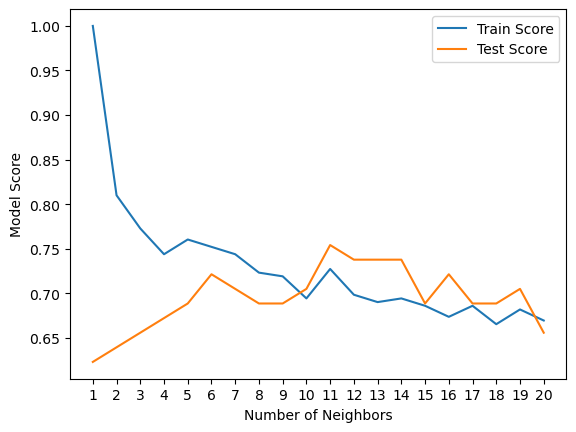

In [24]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)  * 100:.2f}%")
print(f"Optimal number of neighbors: {np.argmax(test_scores) + 1}")

KNN, even with optimization on `n_neighbors`, shows ~10% lower accuracy than the Scikit-Learn LogisticRegression model.

### Hyperparameter tuning with RandomizedSearchCV

[RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) provides an automated method of testing at random various hyperparameters based on a set of predefined inputs and uses [k-folds cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html).

Tuning:
* LogisticRegression()
* RandomizedForestClassifier()

In [25]:
# Create a hyperparameter grid for LogisticRegression to pass into RandomizedSearchCV

log_reg_grid = {
    # returns numbers that are evenly spaced on a log scale
    # between 1 x 10^-4 and 1 x 10^4, returning 20 individual numbers
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# Create hyperparameter grid for RandomForestClassifier for use with RandomizedSearchCV
rf_grid = {
    # n_estimators is the quantity of decision trees to be used
    # creates range of numbers between 10 and 1000 spaced 50 apart (continuous distribution preferred)
    "n_estimators": np.arange(10, 1000, 50),
    # the rest here are related to the size and shape of the tree
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

Set the grids for each model above, now we use RandomizedSearchCV to tune each model to find optimal variants

In [26]:
# LogisticRegression tuning

# Set the seed for reproducibility
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                # k-fold quantity for test/validation splits
                                cv=5,
                                # quantity of variations to test based on possible combinations in grid
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
# View best results from RandomizedSearchCV
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

Running the `.score()` method will use the resulting `.best_params_` attribute from the RandomizedSearchCV execution.

In [28]:
# View resulting score from .best_params_
rs_log_reg.score(X_test, y_test)

0.8852459016393442

LogisticRegression model baseline had similar results. Likely needs more tuning parameters to make RandomizedSearchCV useful.

Now we'll tune RandomForestClassifier...

In [29]:
# Use random seed again
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
# Check the best hyperparameters stored in .best_params_ attribute
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [31]:
# Evaluate the RandomizedSearchCV results for the RandomForestClassifier
rs_rf.score(X_test, y_test)

0.8688524590163934

### What next...
1. We tested models by hand with default hyperparameters
2. We used RandomizedSearchCV to randomly test some recommended hyperparameters
3. Now we can use GridSearchCV to exhaustively test all hyperparameter values within a grid dictionary

**Note**: We can see that the RandomForestClassifier, even with 20 different variations of recommended hyperparameters, the test scores are still less than default results for the Linear Regression model. This tells us it would be ideal as we continue to optimize to exclude Random Forest for this particular effort and focus our time on Linear Regression exclusively.

## Hyperparameter Tuning with GridSearchCV

In [32]:
# New 'grid' dictionary for our LogisticRegression model
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          # name for this param is different than RandomizedSearchCV
                          param_grid=log_reg_grid,
                          # n_iter=20,<-- Since GridSearchCV is exhaustive we do not define iterations, disclude this
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [34]:
# Evaluate GridSearchCV LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

Results are the same as default results for Linear Regression model. Accuracy is reasonably where it is going to stay, we'll stick with this for now...

## Evaluate our tuned Logistic Regression on values other than accuracy

1. ROC curve and AUC score
2. Confusion Matrix
3. Classification Report
4. Precision
5. Recall
6. F1-Score

Use cross-validation when possible

First we need to make predictions...

In [35]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)

In [36]:
# View predicitions
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [37]:
# convert truth values from target column to numpy array for readability to do a human comparison
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

**Note**: ROC Curve allows us to compare True Positive rate to False Positive rate

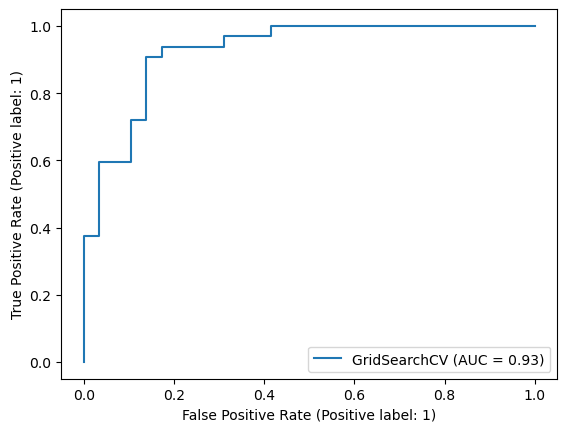

In [38]:
# Plot ROC curve and calculate, calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [39]:
# basic Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


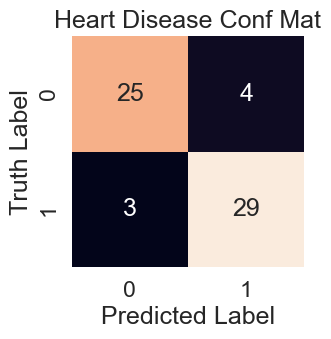

In [41]:
# set font size larger for seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots Confusion Matrix using Seaborns heatmap
    """
    # fig means figure, it's the landscape upon which plots are laid
    # ax mean axes, you can have tuples of axes to define multiple plots across the 'figure'
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
    ax.set_title("Heart Disease Conf Mat")
    plt.xlabel("Predicted Label")
    plt.ylabel("Truth Label")

# Visualize Confusion Matrix using seaborn
plot_conf_mat(y_test, y_preds)

We've completed the creation of a ROC Curve, getting an AUC score, and a confusion matrix.

Next we need to produce:
1. Classification Report
2. Cross-validated:
    * Precision
    * Recall
    * F1-Score

In [43]:
# This produces a report on only a single set of data, it isn't cross-validated
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

Calculate accuracy, precision, recall and f1-score using cross validation. In Scikit-Learn we'll use `cross_val_score()`

In [44]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
# Create new classifier with the best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [60]:
# Function to return cross validation results based on scoring parameter for cross_val_score() method
def cv_score(classifier, all_training_data, all_target_data, scoring_type):
    cv_result = cross_val_score(classifier,
                         # pass in all training data
                         all_training_data,
                         # pass in all the label/target data
                         all_target_data,
                         # could update this to be a parameter but 5 has good results
                         cv=5,
                         # define the score you want to return
                         scoring=scoring_type)

    # get the mean of the cross validated results
    cv_result = np.mean(cv_result)
    return cv_result

In [61]:
# Cross validated accuracy
cv_acc = cv_score(clf, X, y, 'accuracy')

# Print accuracy
print(cv_acc)

0.8446994535519124


In [62]:
# Cross validated precision
# Cross validated accuracy
cv_precision = cv_score(clf, X, y, 'precision')

# Print accuracy
print(cv_precision)

0.8207936507936507


In [63]:
# Cross validated recall
cv_recall = cv_score(clf, X, y, 'recall')

# Print accuracy
print(cv_recall)

0.9212121212121213


In [64]:
# Cross validated F1-score
cv_f1 = cv_score(clf, X, y, 'f1')

# Print accuracy
print(cv_f1)

0.8673007976269721


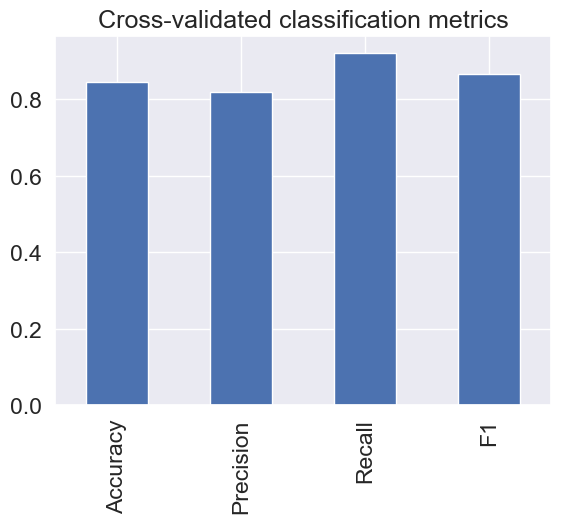

In [71]:
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1,
    },
    index=[0]
)

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Feature importance is a way of asking, **"which features contributed most to the outcome of the model and how much did they contribute to the target?"**

Feature importance is different for each machine learning model.

One way to find feature importance is is to search for "(Model Name; in our case LogisticRegression) feature importance".

In [74]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [75]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

### `.coef_` vs `.corr()`

The Pandas `.corr()` method shows the correlation between various independant variables. Understanding the correlation between
independant variables allows us to do things like dimensionality reduction by removing high correlated features that aren't necessary.

Checking the `.coef_` method of our classifier provides the coefficient values for each independant variable. This provides defines the correlation between
the independant variable and the dependant variable such that we may discern which features have the highest impact on prediction.

In [79]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

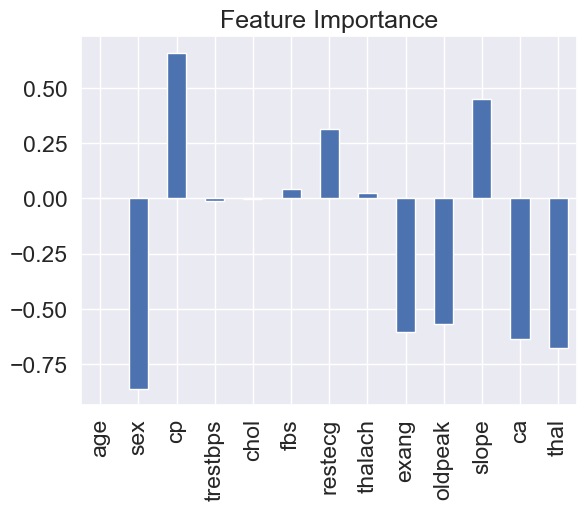

In [82]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# Model driven EDA (Exploratory Data Analysis)
# These correlations help us understand the most impactful attributes of a patient such that we may make better predictions

In [84]:
# Use cross tab to explore the validity of the bar chart above
# For females, a 0 in the data, there is a 3:1 ratio for heart disease
# For males, a 1 in the data, there is ~1:1 ratio for heart disease
# We can see that as the sex attribute tends upward towards 1 there is a decrease is the ratio of Heart Disease:Sex
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [85]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope (the slope of the peak exercise ST segment)
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

During an exercise routine the heart rate is tracked. If there is a downward slope during that exercise, it is indicative of an unhealthy heart.
We can determine that as value tends to 2, the quantity of confirmed persons with heart disease goes up; positive correlation occurs.

## 6. Experimentation

We haven't hit our 95% accuracy metric. Potential follow up questions that could help achieve that target would be:

* Could we collect more data?
* Could we enrich the data that we have?
* Could we use a different model? (CatBoost or XGBoost)
* Could we improve our current models? (Did our optimization work effectively?)

If the model was good enough:
1. Use Pickle to save the model as a binary
2. Store the model artifact for reuse by others